In [1]:
import PySaRLAC as sl
import random
import math
import numpy as np
random.seed(1234)

In [2]:
N=400
raw = sl.RawDataDistribution(N)

for i in range(N):
    raw[i] = random.gauss(0.0,1.0)
    

In [3]:
Lt = 32
raw = sl.CorrelationFunction(Lt)
for t in range(Lt):
    raw.setCoord(t, float(t))
    raw.setValue(t, sl.RawDataDistribution(N))
    raw.value(t).randomGaussian(0.,1.)

    
    

In [4]:
jack = raw.resample(sl.JackknifeDistribution)
djack = raw.resample(sl.DoubleJackknifeDistribution)


In [5]:
jack_fold = jack.fold()

test = (jack.value(1)[0] + jack.value(Lt-1)[0])/2
print(test, jack_fold.value(1)[0])


-0.031760505224040864 -0.031760505224040864


In [6]:
fit_start = 4
fit_end = 16
djack_inrange = djack.sliceRange(fit_start,fit_end)
jack_inrange = jack.sliceRange(fit_start,fit_end)

In [7]:
fitfunc = sl.FitConstant()

In [8]:
fitter = sl.Fitter(fitfunc)

In [9]:
fitter.generateCovarianceMatrix(djack_inrange)

In [10]:
params = [sl.JackknifeDistribution(N,0.5)]

In [11]:
chisq, dof = fitter.fit(params, jack_inrange )

Performing a fit with 1 free parameters and 12 degrees of freedom


In [12]:
chisq.mean()/dof

np.float64(0.9862260165887808)

In [13]:
fit_y = sl.evaluateFitFunc(fitfunc,jack_inrange,params)

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as pyplot

In [15]:
plot_data = jack.plotInputs()
plot_result = fit_y.plotInputs()

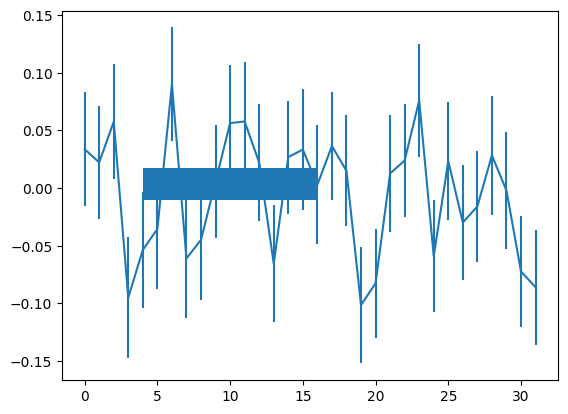

In [16]:
pyplot.errorbar(plot_data[0],plot_data[1],yerr=plot_data[2])
pyplot.fill_between(plot_result[0],plot_result[1]-plot_result[2],plot_result[1]+plot_result[2])